<a href="https://colab.research.google.com/github/THEJoshinator20/ST554-HW/blob/main/554_HW4_McClure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
sdata = pd.read_csv('StudentData.txt', delimiter = ";")
print(sdata.head())
print('-' * 75)

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]
---------------------------------------------------------------------------


# Categorical Variable Graphs

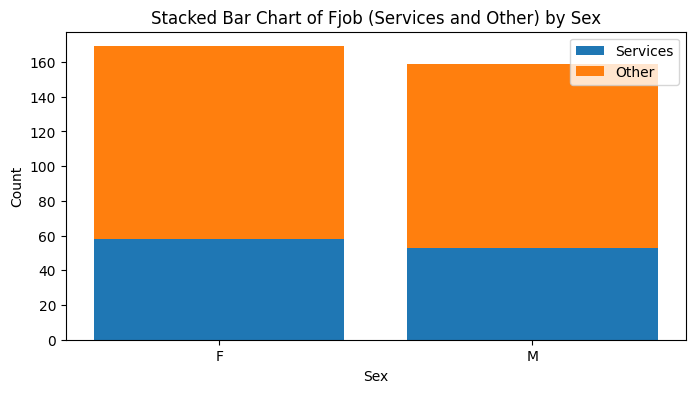

---------------------------------------------------------------------------

Visually for both boys and girls at the school their Mothers jobs are majority something that isn't listed as an option. 
You can tell this from taking the difference between the two stacked volumes.

---------------------------------------------------------------------------


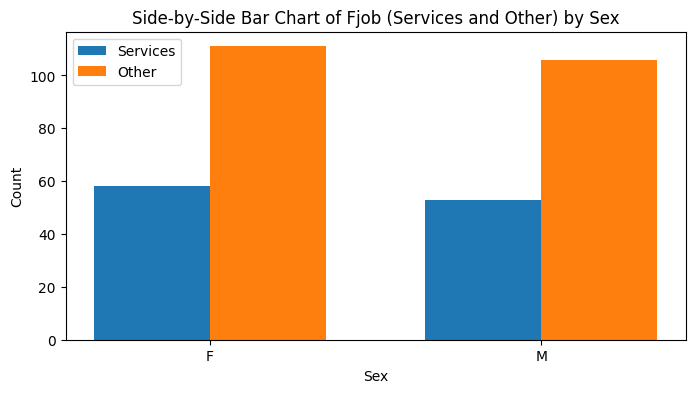

---------------------------------------------------------------------------

Visually for both boys and girls at the school their Mothers jobs are majority something that isn't listed as an option. 
You can tell this just from looking at it easier since they are side by side and not stacked.

---------------------------------------------------------------------------


In [55]:
#Contengency Table used for Barplots
conttable2way = pd.crosstab(index = sdata["sex"], columns = sdata["Fjob"])

#Stacked Barplot of Female Jobs orgainized by the sex of the child
plt.figure(figsize=(8, 4))
plt.bar(x = conttable2way.index,
        height = conttable2way.loc[:, "services"],
        label = "Services")
plt.bar(x = conttable2way.index,
        height = conttable2way.loc[:, "other"],
        bottom =conttable2way.loc[:, "services"],
        label = "Other")

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Stacked Bar Chart of Fjob (Services and Other) by Sex")
plt.legend(loc=0)
plt.show()
print('-' * 75)
print("\nVisually for both boys and girls at the school their Mothers jobs are majority something that isn't listed as an option. \nYou can tell this from taking the difference between the two stacked volumes.\n")
print('-' * 75)

#Side by side Barplot of Female Jobs orgainized by the sex of the child
sex_categories = conttable2way.index
x_pos = np.arange(len(sex_categories))
bar_width = 0.35

plt.figure(figsize=(8, 4))
plt.bar(x_pos - bar_width/2,
        conttable2way.loc[:, "services"],
        width = bar_width,
        label = "Services")

plt.bar(x_pos + bar_width/2,
        conttable2way.loc[:, "other"],
        width = bar_width,
        label = "Other")

plt.xticks(x_pos, sex_categories)
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Side-by-Side Bar Chart of Fjob (Services and Other) by Sex")
plt.legend(loc=0)
plt.show()
print('-' * 75)
print("\nVisually for both boys and girls at the school their Mothers jobs are majority something that isn't listed as an option. \nYou can tell this just from looking at it easier since they are side by side and not stacked.\n")
print('-' * 75)

%timeit for _ in range(100): True

# Numeric Variable Graphs

Histogram, Kernel Density Plot, Boxplot

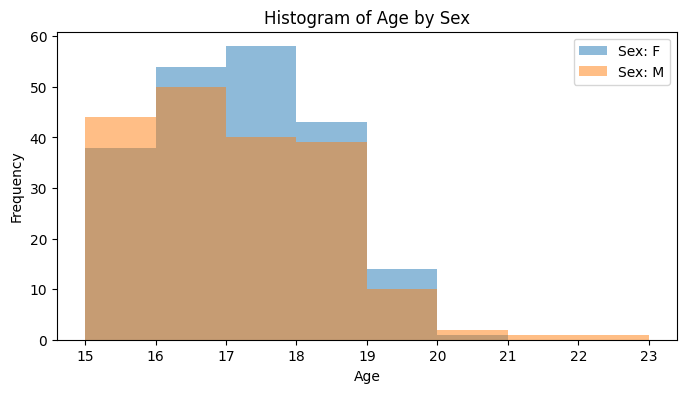

---------------------------------------------------------------------------

Looking at boy and girl students in the school we can see that there are more boys with higher ages than girls but a higher concentration of girls between 16 and 19.

---------------------------------------------------------------------------


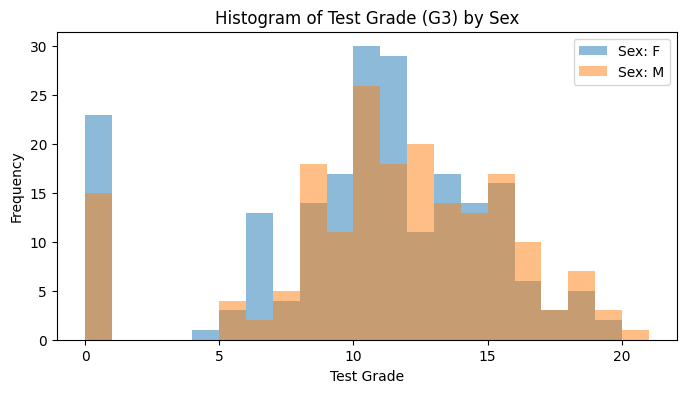

---------------------------------------------------------------------------

Looking at boy and girl students in the school we can see that the girls have a higher average score but boys have a higher maximum score.

---------------------------------------------------------------------------


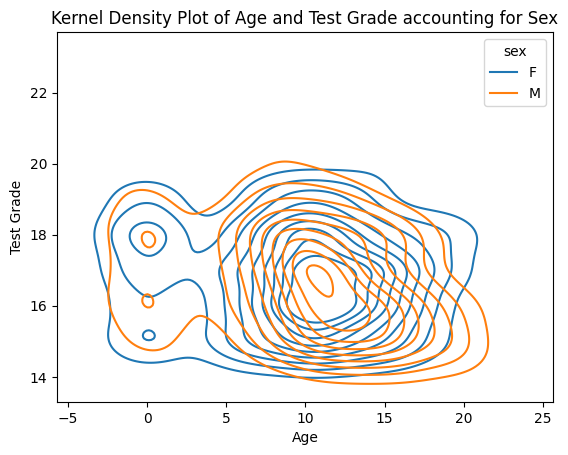

---------------------------------------------------------------------------

Looking at boy and girl students in the school we can see that there are multiple peaks both males and females with females having higher peaks 
than males similar to the histogram.

---------------------------------------------------------------------------


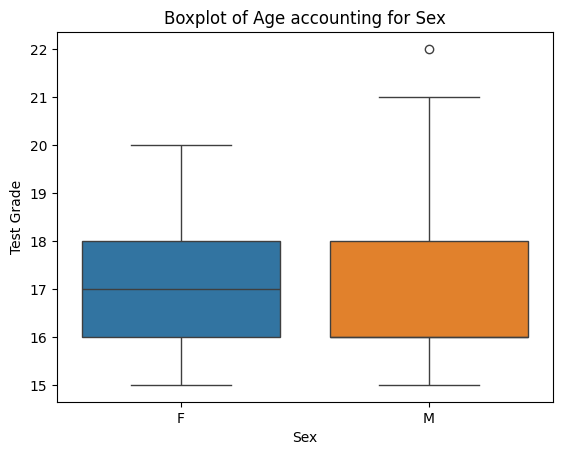

---------------------------------------------------------------------------

The boxplot shows that the mean age for females is 17 with an IQR of 16-18. Males are more interesting with having an outlier of 22 and having 
a suspecting mean of ~16. Influenced in large by the outlier provided.

---------------------------------------------------------------------------


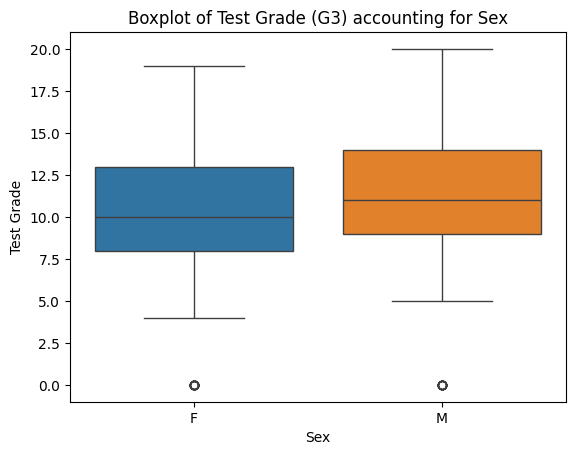

---------------------------------------------------------------------------

The boxplot shows that the mean test grades for females is 10 with an IQR of ~ 8-13. Males have an mean of ~11 with an IQR of ~9-14. 
Both boxplots are influenced in large by the outliers located at 0.

---------------------------------------------------------------------------


In [56]:
#Histogram for 2 numeric with 1 categorical variable

# Histogram for 'age' by 'sex'
plt.figure(figsize=(8, 4))
# Iterate through each sex group and plot a histogram for 'age'
for sex_val, group_df in sdata.groupby("sex"):
    plt.hist(group_df["age"], alpha=0.5, label=f"Sex: {sex_val}", bins=np.arange(sdata['age'].min(), sdata['age'].max() + 2, 1))
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age by Sex")
plt.legend()
plt.show()
print('-' * 75)
print("\nLooking at boy and girl students in the school we can see that there are more boys with higher ages than girls but a higher concentration of girls between 16 and 19.\n")
print('-' * 75)

# Histogram for 'G3' by 'sex'
plt.figure(figsize=(8, 4))
# Iterate through each sex group and plot a histogram for 'G3'
for sex_val, group_df in sdata.groupby("sex"):
    plt.hist(group_df["G3"], alpha=0.5, label=f"Sex: {sex_val}", bins=np.arange(sdata['G3'].min(), sdata['G3'].max() + 2, 1))
plt.xlabel("Test Grade")
plt.ylabel("Frequency")
plt.title("Histogram of Test Grade (G3) by Sex")
plt.legend()
plt.show()
print('-' * 75)
print("\nLooking at boy and girl students in the school we can see that the girls have a higher average score but boys have a higher maximum score.\n")
print('-' * 75)

#Kernel Density plot for 2 numeric with 1 categortical variable
kersexageg3 = sns.kdeplot(x = sdata.G3, y = sdata.age, hue = sdata.sex)
kersexageg3.set_xlabel("Age")
kersexageg3.set_ylabel("Test Grade")
kersexageg3.set_title("Kernel Density Plot of Age and Test Grade accounting for Sex")
plt.show()
print('-' * 75)
print("\nLooking at boy and girl students in the school we can see that there are multiple peaks both males and females with females having higher peaks \nthan males similar to the histogram.\n")
print('-' * 75)

#Boxplot for 2 numeric with 1 categortical variable
boxageg3 = sns.boxplot(x = sdata.sex, y = sdata.age, hue = sdata.sex)
boxageg3.set_xlabel("Sex")
boxageg3.set_ylabel("Test Grade")
boxageg3.set_title("Boxplot of Age accounting for Sex")
plt.show()
print('-' * 75)
print("\nThe boxplot shows that the mean age for females is 17 with an IQR of 16-18. Males are more interesting with having an outlier of 22 and having \na suspecting mean of ~16. Influenced in large by the outlier provided.\n")
print('-' * 75)

boxageg3 = sns.boxplot(x = sdata.sex, y = sdata.G3, hue = sdata.sex)
boxageg3.set_xlabel("Sex")
boxageg3.set_ylabel("Test Grade")
boxageg3.set_title("Boxplot of Test Grade (G3) accounting for Sex")
plt.show()
print('-' * 75)
print("\nThe boxplot shows that the mean test grades for females is 10 with an IQR of ~ 8-13. Males have an mean of ~11 with an IQR of ~9-14. \nBoth boxplots are influenced in large by the outliers located at 0.\n")
print('-' * 75)

%timeit for _ in range(100): True


Scatter Plot for G3 and Age/Absences

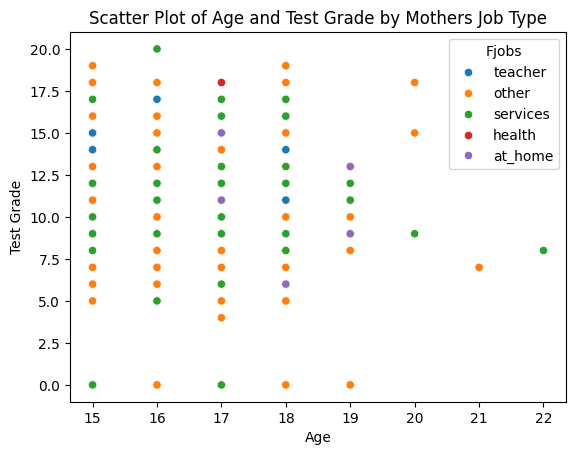

---------------------------------------------------------------------------

This plots shows that the serice and other job types for the Mothers have appear in each age group in higher proportions than the other job types.

---------------------------------------------------------------------------


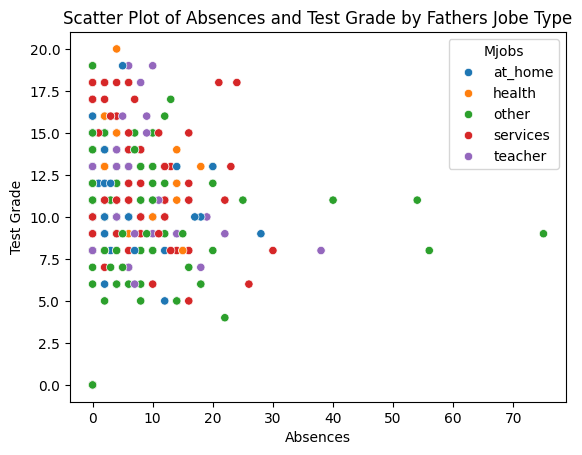

---------------------------------------------------------------------------

This plots shows that the the job type the father has the absences before 20 happen with all job types. It also shows that absences are more likely 
to occur when test scores are between 8 and 15.

---------------------------------------------------------------------------


In [57]:
scater1 = sns.scatterplot(data = sdata, x = "age", y = "G3", hue = "Fjob")
plt.xlabel("Age")
plt.ylabel("Test Grade")
plt.title("Scatter Plot of Age and Test Grade by Mothers Job Type")
plt.legend(title='Fjobs')
plt.show()
print('-' * 75)
print("\nThis plots shows that the serice and other job types for the Mothers have appear in each age group in higher proportions than the other job types.\n")
print('-' * 75)

scater1 = sns.scatterplot(data = sdata, x = "absences", y = "G3", hue = "Mjob")
plt.xlabel("Absences")
plt.ylabel("Test Grade")
plt.title("Scatter Plot of Absences and Test Grade by Fathers Jobe Type")
plt.legend(title='Mjobs')
plt.show()
print('-' * 75)
print("\nThis plots shows that the the job type the father has the absences before 20 happen with all job types. It also shows that absences are more likely \nto occur when test scores are between 8 and 15.\n")
print('-' * 75)

%timeit for _ in range(100): True

# NFL Data

Read in Data

In [30]:
nfldata = pd.read_csv('scoresFull.csv', delimiter = ",")
nfldata['homeTeam'] = nfldata['homeTeam'].astype('category')
nfldata['awayTeam'] = nfldata['awayTeam'].astype('category')
nfldata['day'] = nfldata['day'].astype('category')
nfldata['stadium'] = nfldata['stadium'].astype('category')
nfldata['startTime'] = nfldata['startTime'].astype('category')
nfldata['toss'] = nfldata['toss'].astype('category')
nfldata['roof'] = nfldata['roof'].astype('category')
nfldata['surface'] = nfldata['surface'].astype('category')
print(nfldata.head())
print(nfldata.info())

  week   date  day  season             awayTeam  AQ1  AQ2  AQ3  AQ4  AOT  ...  \
0    1  5-Sep  Thu    2002  San Francisco 49ers    3    0    7    6   -1  ...   
1    1  8-Sep  Sun    2002    Minnesota Vikings    3   17    0    3   -1  ...   
2    1  8-Sep  Sun    2002   New Orleans Saints    6    7    7    0    6  ...   
3    1  8-Sep  Sun    2002        New York Jets    0   17    3   11    6  ...   
4    1  8-Sep  Sun    2002    Arizona Cardinals   10    3    3    7   -1  ...   

   homeFumLost  homeNumPen homePenYds  home3rdConv  home3rdAtt  home4thConv  \
0            0          10         80            4           8            0   
1            1           4         33            2           6            0   
2            0           8         85            1           6            0   
3            1          10         82            4           8            2   
4            0           7         56            6          10            1   

   home4thAtt  homeTOP  HminusAScore  

Summarize the Data

In [31]:
#Filter to only include the weeks 1-17
nfldata['week_numeric'] = pd.to_numeric(nfldata['week'], errors='coerce')
nfl = nfldata.loc[nfldata['week_numeric'] < 17].copy()
nfl['week'] = nfl['week'].astype('int')

#Grouping by season, week, and season & week with different variables
nflbyseason = nfl.groupby('season')[["homeTeam", "awayTeam", "HFinal", "AFinal"]].describe()
nflbyweek = nfl.groupby('week')[["HtotalYds", "Hturnovers", "HtotalPlays", "AtotalYds", "Aturnovers", "AtotalPlays"]].describe()
nflbyweekseason = nfl.groupby(['season', 'week'])[["attendance", "duration", "stadium", "weather", "OUvalue", "OUresult"]].describe()

print(nflbyseason)
print('-' * 75)
print(nflbyweek)
print('-' * 75)
print(nflbyweekseason)

%timeit for _ in range(100): True

       HFinal                                                     AFinal  \
        count       mean        std  min    25%   50%   75%   max  count   
season                                                                     
2002    240.0  22.779167  10.033687  0.0  16.00  23.0  30.0  52.0  240.0   
2003    240.0  22.683333  10.256936  0.0  16.00  23.0  28.0  50.0  240.0   
2004    240.0  22.841667  10.537437  0.0  16.00  23.0  30.0  58.0  240.0   
2005    240.0  22.362500   9.809794  0.0  16.00  21.0  28.0  52.0  240.0   
2006    240.0  21.041667   9.994891  0.0  14.00  20.0  27.0  48.0  240.0   
2007    240.0  22.841667  10.489681  3.0  14.00  21.5  31.0  56.0  240.0   
2008    240.0  23.033333  10.332492  0.0  15.00  23.0  30.0  56.0  240.0   
2009    240.0  22.583333  10.686544  0.0  16.00  23.0  30.0  59.0  240.0   
2010    240.0  23.066667  10.215038  0.0  15.75  24.0  31.0  49.0  240.0   
2011    240.0  23.625000  10.268824  0.0  17.00  23.0  30.0  62.0  240.0   
2012    240.

NFL group by season Plots

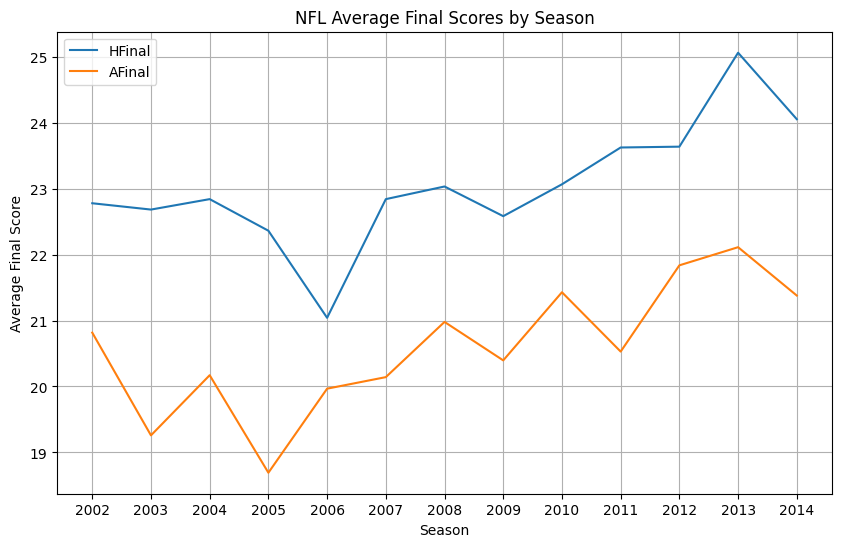

---------------------------------------------------------------------------

The graph shows that the per season(year) the final score for the home team has always been higher than the away team. 
It also shows that the increases and decrases in both the home and away teams are nearly proportional to one another.

---------------------------------------------------------------------------


In [58]:
nflbyseason = nfl.groupby('season')[["homeTeam", "awayTeam", "HFinal", "AFinal"]].describe()

def nflseasonline(df, x_col, y_cols, title):
  plt.figure(figsize=(10, 6))
  for y_col in y_cols:
    plt.plot(df.index, df[y_col], label=y_col[0]) # Plot mean for HFinal and AFinal
  plt.xlabel("Season")
  plt.ylabel("Average Final Score")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.xticks(df.index)
  plt.show()

# Call the function with appropriate columns from nflbyseason (mean of HFinal and AFinal)
y_columns_to_plot = [('HFinal', 'mean'), ('AFinal', 'mean')]
nflseasonline(nflbyseason, 'season', y_columns_to_plot, 'NFL Average Final Scores by Season')
print('-' * 75)
print("\nThe graph shows that the per season(year) the final score for the home team has always been higher than the away team. \nIt also shows that the increases and decrases in both the home and away teams are nearly proportional to one another.\n")
print('-' * 75)

%timeit for _ in range(100): True

NFL group by week Plots

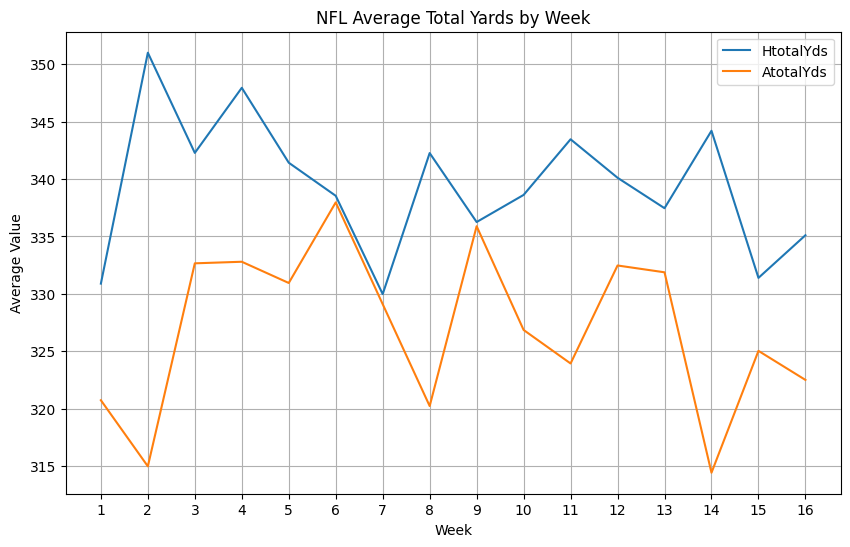

---------------------------------------------------------------------------

This graph shows that per week the total yards that the home team runs more total yards than the away team. 
It shows that when one teams total is larger the other teams total is smaller.

---------------------------------------------------------------------------


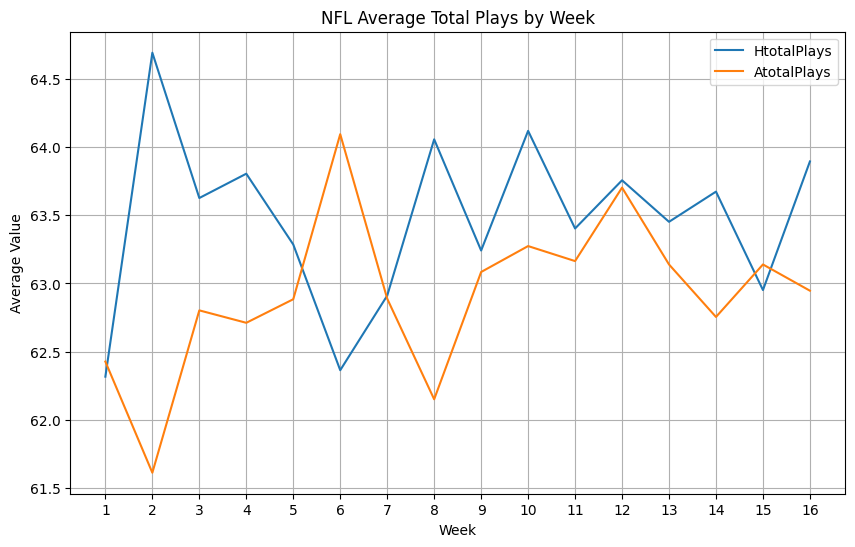

---------------------------------------------------------------------------

Instead of telling you what this graph shows I see instead that there is a relationship between the amount total plays done and the total yards ran per week. 
The larger the total plays is then the more yards the team ran in total for most of the weeks.

---------------------------------------------------------------------------


In [59]:
nflbyweek = nfl.groupby('week')[["HtotalYds", "Hturnovers", "HtotalPlays", "AtotalYds", "Aturnovers", "AtotalPlays"]].describe()

def nflweekline(df, x_col, y_cols, title):
  plt.figure(figsize=(10, 6))
  for y_col in y_cols:
    plt.plot(df.index, df[y_col], label=y_col[0])
  plt.xlabel("Week")
  plt.ylabel("Average Value")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  plt.xticks(df.index)
  plt.show()

y_columns_to_plot = [('HtotalYds', 'mean'), ('AtotalYds', 'mean')]
nflweekline(nflbyweek, 'week', y_columns_to_plot, 'NFL Average Total Yards by Week')
print('-' * 75)
print("\nThis graph shows that per week the total yards that the home team runs more total yards than the away team. \nIt shows that when one teams total is larger the other teams total is smaller.\n")
print('-' * 75)

y_columns_to_plot = [('HtotalPlays', 'mean'), ('AtotalPlays', 'mean')]
nflweekline(nflbyweek, 'week', y_columns_to_plot, 'NFL Average Total Plays by Week')
print('-' * 75)
print("\nInstead of telling you what this graph shows I see instead that there is a relationship between the amount total plays done and the total yards ran per week. \nThe larger the total plays is then the more yards the team ran in total for most of the weeks.\n")
print('-' * 75)

%timeit for _ in range(100): True

NFL Group by week and season Plots

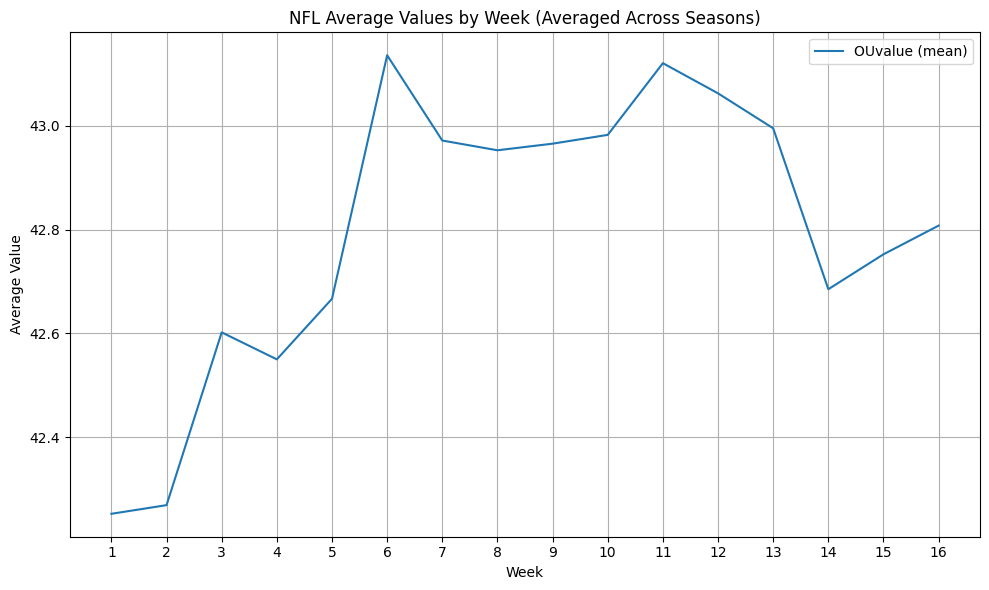

---------------------------------------------------------------------------

The average number of goals per weak over the different seasons(years) seems to for the most part increase as the weeks progress. 
This could be from more better teams being in the finals or that the stakes become ore intense.

---------------------------------------------------------------------------


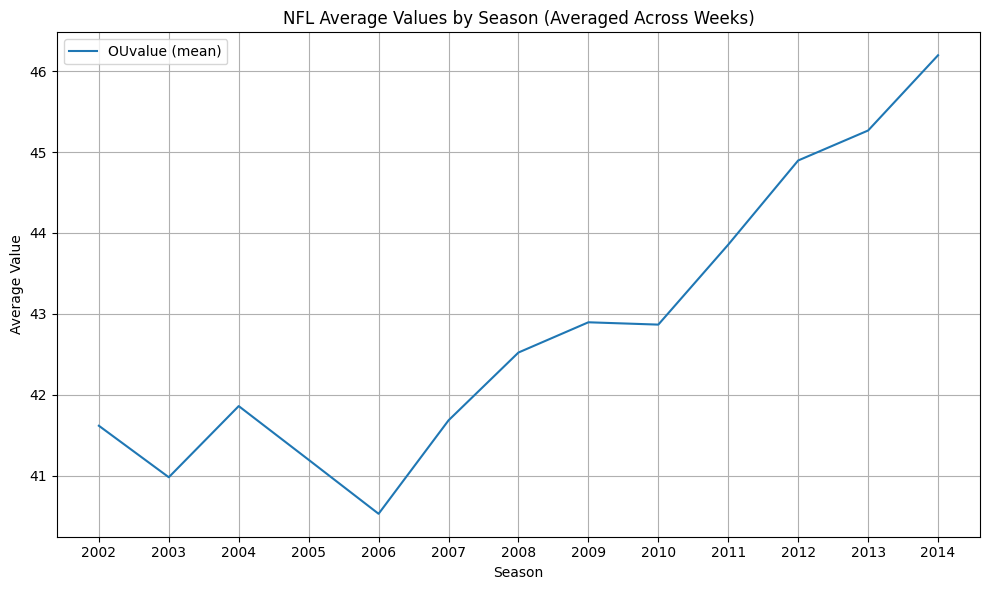

---------------------------------------------------------------------------

The average number of goals per season(year) when overaging over the weeks stays arround 40 until 2006 where ist sharply increases. 
This means that either the skill of the players had increase or that the rules of the games make scores points easier.

---------------------------------------------------------------------------


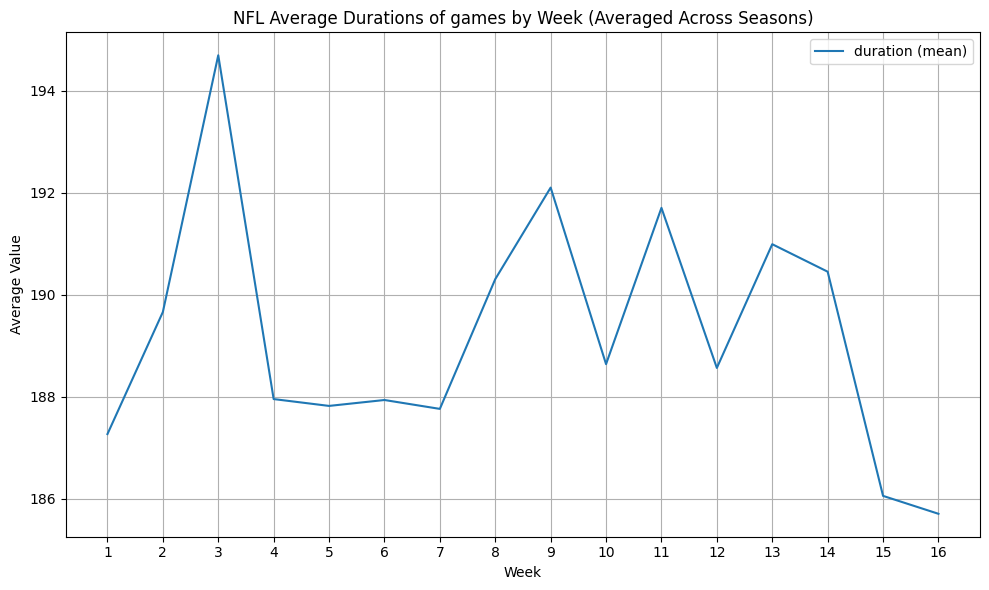

---------------------------------------------------------------------------

The average duration of football games per week averaged across the seasons(years) varies highly in the beginning showing how important the begining of a season is to a team. 
At the end the amount of time drops which could signify that the teams don't need as much time to settle the game / they don't go into overtime.

---------------------------------------------------------------------------


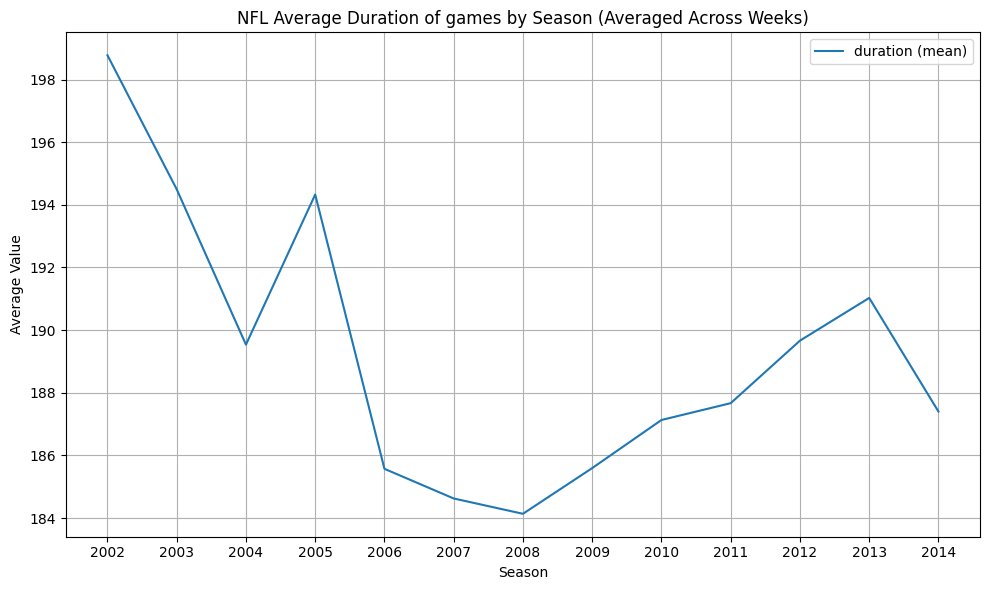

---------------------------------------------------------------------------

The average duration of football games per seasons(years averaged across weeks shows that as the the seasons went by the average amount of time needed per week per season for every game went down. 
This reflects similarly to the graph above and demonstates how the number of points and the duration have a relationship of some sort. 
Are players performing better, are rules changing, and more importantly is it something that we control or is it an invisible variable/variables.

---------------------------------------------------------------------------
1.02 µs ± 34.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [60]:
nflbyweekseason = nfl.groupby(['season', 'week'])[["attendance", "duration", "stadium", "weather", "OUvalue", "OUresult"]].describe()

def nflweekseasonline(df, x_label, y_cols, title):
  plt.figure(figsize=(10, 6))
  for y_col in y_cols:
    plt.plot(df.index, df[y_col], label=f"{y_col[0]} ({y_col[1]})")
  plt.xlabel(x_label)
  plt.ylabel("Average Value")
  plt.title(title)
  plt.legend()
  plt.grid(True)
  # Adjust x-ticks as necessary, especially for MultiIndex or many values
  if len(df.index) < 20: # Only set xticks if not too dense
      plt.xticks(df.index)
  else:
      plt.tick_params(axis='x', rotation=45)
  plt.tight_layout()
  plt.show()

# Define y_columns_to_plot outside the function with corrected typo
y_columns_to_plot_by_season_week = [('OUvalue', 'mean')]

# Aggregate nflbyweekseason to get means for 'week' (averaging over seasons)
average_by_week = nflbyweekseason[y_columns_to_plot_by_season_week].groupby(level='week').mean()
nflweekseasonline(average_by_week, 'Week', y_columns_to_plot_by_season_week, 'NFL Average Values by Week (Averaged Across Seasons)')
print('-' * 75)
print("\nThe average number of goals per weak over the different seasons(years) seems to for the most part increase as the weeks progress. \nThis could be from more better teams being in the finals or that the stakes become ore intense.\n")
print('-' * 75)

# Aggregate nflbyweekseason to get means for 'season' (averaging over weeks)
average_by_season = nflbyweekseason[y_columns_to_plot_by_season_week].groupby(level='season').mean()
nflweekseasonline(average_by_season, 'Season', y_columns_to_plot_by_season_week, 'NFL Average Values by Season (Averaged Across Weeks)')
print('-' * 75)
print("\nThe average number of goals per season(year) when overaging over the weeks stays arround 40 until 2006 where ist sharply increases. \nThis means that either the skill of the players had increase or that the rules of the games make scores points easier.\n")
print('-' * 75)

# Define y_columns_to_plot outside the function with corrected typo
y_columns_to_plot_by_season_week = [('duration', 'mean')]

# Aggregate nflbyweekseason to get means for 'week' (averaging over seasons)
average_by_week = nflbyweekseason[y_columns_to_plot_by_season_week].groupby(level='week').mean()
nflweekseasonline(average_by_week, 'Week', y_columns_to_plot_by_season_week, 'NFL Average Durations of games by Week (Averaged Across Seasons)')
print('-' * 75)
print("\nThe average duration of football games per week averaged across the seasons(years) varies highly in the beginning showing how important the begining of a season is to a team. \nAt the end the amount of time drops which could signify that the teams don't need as much time to settle the game / they don't go into overtime.\n")
print('-' * 75)

# Aggregate nflbyweekseason to get means for 'season' (averaging over weeks)
average_by_season = nflbyweekseason[y_columns_to_plot_by_season_week].groupby(level='season').mean()
nflweekseasonline(average_by_season, 'Season', y_columns_to_plot_by_season_week, 'NFL Average Duration of games by Season (Averaged Across Weeks)')
print('-' * 75)
print("\nThe average duration of football games per seasons(years averaged across weeks shows that as the the seasons went by the average amount of time needed per week per season for every game went down. \nThis reflects similarly to the graph above and demonstates how the number of points and the duration have a relationship of some sort. \nAre players performing better, are rules changing, and more importantly is it something that we control or is it an invisible variable/variables.\n")
print('-' * 75)

%timeit for _ in range(100): True
